<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Initialize-pyspark-framework" data-toc-modified-id="Initialize-pyspark-framework-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initialize pyspark framework</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Overview-of-Dataset" data-toc-modified-id="Overview-of-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overview of Dataset</a></span><ul class="toc-item"><li><span><a href="#Data-schema" data-toc-modified-id="Data-schema-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data schema</a></span></li><li><span><a href="#Columns-overview" data-toc-modified-id="Columns-overview-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Columns overview</a></span></li><li><span><a href="#Summary-statistics-for-numeric-variables" data-toc-modified-id="Summary-statistics-for-numeric-variables-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Summary statistics for numeric variables</a></span></li><li><span><a href="#Show-data-and-data-count" data-toc-modified-id="Show-data-and-data-count-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Show data and data count</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Checking-Correlations-between-independent-variables" data-toc-modified-id="Checking-Correlations-between-independent-variables-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Checking Correlations between independent variables</a></span></li><li><span><a href="#Explore-relationships-across-the-entire-dataset" data-toc-modified-id="Explore-relationships-across-the-entire-dataset-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Explore relationships across the entire dataset</a></span></li></ul></li><li><span><a href="#Distribution-of-Data" data-toc-modified-id="Distribution-of-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Distribution of Data</a></span></li><li><span><a href="#Common-trend" data-toc-modified-id="Common-trend-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Common trend</a></span></li><li><span><a href="#Heatmap-for-comprehensive-overview" data-toc-modified-id="Heatmap-for-comprehensive-overview-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Heatmap for comprehensive overview</a></span></li><li><span><a href="#Stop-the-spark-session" data-toc-modified-id="Stop-the-spark-session-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Stop the spark session</a></span></li></ul></div>

# Load Libraries

In [1]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains, isnan, udf, hour, array_min, array_max, countDistinct, quarter
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark import SparkConf, SparkContext
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import seaborn as sns
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline
from matplotlib.pyplot import figure
import numpy as np
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")

# Initialize pyspark framework

In [2]:
conf = pyspark.SparkConf().setAll([('spark.master', 'local[*]'),
                                   ('spark.app.name', 'Python Spark SQL Demo')])
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# Load data

In [3]:
!pwd

/home/work/ecommerce


In [4]:
!ls

'E-commerce EDA.ipynb'		    order_items_dataset.csv
'E-commerce Sales Forecast.ipynb'   order_payments_dataset.csv
 customer_reviews_dataset.csv	    orders_dataset.csv
 customers_dataset.csv		    product_category_name_translation.csv
 geolocation_dataset.csv	    products_dataset.csv
 launch.sh			    sellers_dataset.csv


In [5]:
!hadoop fs -mkdir /data

mkdir: `/data': File exists


In [6]:
!hadoop fs -copyFromLocal products_dataset.csv /data

copyFromLocal: `/data/products_dataset.csv': File exists


In [7]:
!hadoop fs -copyFromLocal product_category_name_translation.csv /data

copyFromLocal: `/data/product_category_name_translation.csv': File exists


In [8]:
!hadoop fs -copyFromLocal customers_dataset.csv /data

copyFromLocal: `/data/customers_dataset.csv': File exists


In [9]:
!hadoop fs -copyFromLocal sellers_dataset.csv /data

copyFromLocal: `/data/sellers_dataset.csv': File exists


In [10]:
!hadoop fs -copyFromLocal orders_dataset.csv /data

copyFromLocal: `/data/orders_dataset.csv': File exists


In [11]:
!hadoop fs -copyFromLocal order_payments_dataset.csv /data

copyFromLocal: `/data/order_payments_dataset.csv': File exists


In [12]:
!hadoop fs -copyFromLocal order_items_dataset.csv /data

copyFromLocal: `/data/order_items_dataset.csv': File exists


In [13]:
!hadoop fs -copyFromLocal geolocation_dataset.csv /data

copyFromLocal: `/data/geolocation_dataset.csv': File exists


In [14]:
!hadoop fs -copyFromLocal customer_reviews_dataset.csv /data

copyFromLocal: `/data/customer_reviews_dataset.csv': File exists


In [15]:
DATA_PATH="hdfs:///data/"
products_dataset = spark.read.csv(DATA_PATH+"products_dataset.csv", header=True, inferSchema = True)
product_category_name_translation = spark.read.csv(DATA_PATH+"product_category_name_translation.csv", header=True, inferSchema = True)
customers_dataset = spark.read.csv(DATA_PATH+"customers_dataset.csv", header=True, inferSchema = True)
sellers_dataset = spark.read.csv(DATA_PATH+"sellers_dataset.csv", header=True, inferSchema = True)
orders_dataset = spark.read.csv(DATA_PATH+"orders_dataset.csv", header=True, inferSchema = True)
order_payments_dataset = spark.read.csv(DATA_PATH+"order_payments_dataset.csv", header=True, inferSchema = True)
order_items_dataset = spark.read.csv(DATA_PATH+"order_items_dataset.csv", header=True, inferSchema = True)
geolocation_dataset = spark.read.csv(DATA_PATH+"geolocation_dataset.csv", header=True, inferSchema = True)
customer_reviews_dataset = spark.read.csv(DATA_PATH+"customer_reviews_dataset.csv", header=True, inferSchema = True)

# Overview of Dataset

## Data schema

In [16]:
print('Data overview')
products_dataset.printSchema()

Data overview
root
 |-- product_id: string (nullable = true)
 |-- product_category_name: string (nullable = true)
 |-- product_name_lenght: integer (nullable = true)
 |-- product_description_lenght: integer (nullable = true)
 |-- product_photos_qty: integer (nullable = true)
 |-- product_weight_g: integer (nullable = true)
 |-- product_length_cm: integer (nullable = true)
 |-- product_height_cm: integer (nullable = true)
 |-- product_width_cm: integer (nullable = true)



In [17]:
print('Data overview')
product_category_name_translation.printSchema()

Data overview
root
 |-- product_category_name: string (nullable = true)
 |-- product_category_name_english: string (nullable = true)



In [18]:
print('Data overview')
customers_dataset.printSchema()

Data overview
root
 |-- customer_id: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)



In [19]:
print('Data overview')
sellers_dataset.printSchema()

Data overview
root
 |-- seller_id: string (nullable = true)
 |-- seller_zip_code_prefix: integer (nullable = true)
 |-- seller_city: string (nullable = true)
 |-- seller_state: string (nullable = true)



In [20]:
print('Data overview')
orders_dataset.printSchema()

Data overview
root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_approved_at: string (nullable = true)
 |-- order_carrier_delivery_date: string (nullable = true)
 |-- order_customer_delivery_date: string (nullable = true)
 |-- order_estimated_delivery_date: string (nullable = true)



In [21]:
print('Data overview')
order_payments_dataset.printSchema()

Data overview
root
 |-- order_id: string (nullable = true)
 |-- payment_sequential: integer (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- payment_installments: integer (nullable = true)
 |-- payment_value: double (nullable = true)



In [22]:
print('Data overview')
order_items_dataset.printSchema()

Data overview
root
 |-- order_id: string (nullable = true)
 |-- order_item_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)



In [23]:
print('Data overview')
geolocation_dataset.printSchema()

Data overview
root
 |-- geo_zip_code_prefix: integer (nullable = true)
 |-- geo_lat: double (nullable = true)
 |-- geo_lng: double (nullable = true)
 |-- geo_city: string (nullable = true)
 |-- geo_state: string (nullable = true)



In [24]:
print('Data overview')
customer_reviews_dataset.printSchema()

Data overview
root
 |-- review_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- survey_score: string (nullable = true)
 |-- survey_review_title: string (nullable = true)
 |-- survey_review_content: string (nullable = true)
 |-- survey_send_date: string (nullable = true)
 |-- survey_completion_date: string (nullable = true)



## Columns overview

In [25]:
print('Columns overview')
pd.DataFrame(products_dataset.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0                  product_id    string
1       product_category_name    string
2         product_name_lenght       int
3  product_description_lenght       int
4          product_photos_qty       int
5            product_weight_g       int
6           product_length_cm       int
7           product_height_cm       int
8            product_width_cm       int

In [26]:
print('Columns overview')
pd.DataFrame(product_category_name_translation.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0          product_category_name    string
1  product_category_name_english    string

In [27]:
print('Columns overview')
pd.DataFrame(customers_dataset.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0               customer_id    string
1        customer_unique_id    string
2  customer_zip_code_prefix       int
3             customer_city    string
4            customer_state    string

In [28]:
print('Columns overview')
pd.DataFrame(sellers_dataset.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0               seller_id    string
1  seller_zip_code_prefix       int
2             seller_city    string
3            seller_state    string

In [29]:
print('Columns overview')
pd.DataFrame(orders_dataset.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0                       order_id    string
1                    customer_id    string
2                   order_status    string
3       order_purchase_timestamp    string
4              order_approved_at    string
5    order_carrier_delivery_date    string
6   order_customer_delivery_date    string
7  order_estimated_delivery_date    string

In [30]:
print('Columns overview')
pd.DataFrame(order_payments_dataset.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0              order_id    string
1    payment_sequential       int
2          payment_type    string
3  payment_installments       int
4         payment_value    double

In [31]:
print('Columns overview')
pd.DataFrame(order_items_dataset.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0             order_id    string
1        order_item_id       int
2           product_id    string
3            seller_id    string
4  shipping_limit_date    string
5                price    double
6        freight_value    double

In [32]:
print('Columns overview')
pd.DataFrame(geolocation_dataset.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0  geo_zip_code_prefix       int
1              geo_lat    double
2              geo_lng    double
3             geo_city    string
4            geo_state    string

In [33]:
print('Columns overview')
pd.DataFrame(customer_reviews_dataset.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0               review_id    string
1                order_id    string
2            survey_score    string
3     survey_review_title    string
4   survey_review_content    string
5        survey_send_date    string
6  survey_completion_date    string

## Summary statistics for numeric variables

In [34]:
print('Data frame describe (string and numeric columns only):')
products_dataset.describe().toPandas()

Data frame describe (string and numeric columns only):


summary                        product_id      product_category_name  \
0   count                             32951                      32341   
1    mean                              None                       None   
2  stddev                              None                       None   
3     min  00066f42aeeb9f3007548bb9d3f33c38  agro_industria_e_comercio   
4     max  fffe9eeff12fcbd74a2f2b007dde0c58      utilidades_domesticas   

  product_name_lenght product_description_lenght  product_photos_qty  \
0               32341                      32341               32341   
1   48.47694876472589          771.4952846232337  2.1889861166939797   
2  10.245740725237287          635.1152246349538  1.7367656379315435   
3                   5                          4                   1   
4                  76                       3992                  20   

     product_weight_g   product_length_cm   product_height_cm  \
0               32949               32949               32949   
1  2276.4724877841513   30.81507784758263  16.937661234028347   
2   4282.038730977024  16.914458054065953  13.637554061749569   
3                   0                   7                   2   
4               40425                 105                 105   

     product_width_cm  
0               32949  
1  23.196728277034204  
2  12.079047453227794  
3                   6  
4                 118

In [35]:
print('Data frame describe (string and numeric columns only):')
product_category_name_translation.describe().toPandas()

Data frame describe (string and numeric columns only):


summary      product_category_name product_category_name_english
0   count                         71                            71
1    mean                       None                          None
2  stddev                       None                          None
3     min  agro_industria_e_comercio    agro_industry_and_commerce
4     max      utilidades_domesticas                 watches_gifts

In [36]:
print('Data frame describe (string and numeric columns only):')
customers_dataset.describe().toPandas()

Data frame describe (string and numeric columns only):


summary                       customer_id                customer_unique_id  \
0   count                             99441                             99441   
1    mean                              None                              None   
2  stddev                              None                              None   
3     min  00012a2ce6f8dcda20d059ce98491703  0000366f3b9a7992bf8c76cfdf3221e2   
4     max  ffffe8b65bbe3087b653a978c870db99  ffffd2657e2aad2907e67c3e9daecbeb   

  customer_zip_code_prefix        customer_city customer_state  
0                    99441                99441          99441  
1        35137.47458291851                 None           None  
2        29797.93899620613                 None           None  
3                     1003  abadia dos dourados             AC  
4                    99990               zortea             TO

In [37]:
print('Data frame describe (string and numeric columns only):')
sellers_dataset.describe().toPandas()

Data frame describe (string and numeric columns only):


summary                         seller_id seller_zip_code_prefix  \
0   count                              3095                   3095   
1    mean                              None     32291.059450726978   
2  stddev                              None      32713.45382950901   
3     min  0015a82c2db000af6aaaf3ae2ecb0532                   1001   
4     max  ffff564a4f9085cd26170f4732393726                  99730   

  seller_city seller_state  
0        3095         3095  
1   4482255.0         None  
2        None         None  
3    04482255           AC  
4       xaxim           SP

In [38]:
print('Data frame describe (string and numeric columns only):')
orders_dataset.describe().toPandas()

Data frame describe (string and numeric columns only):


summary                          order_id                       customer_id  \
0   count                             99441                             99441   
1    mean                              None                              None   
2  stddev                              None                              None   
3     min  00010242fe8c5a6d1ba2dd792cb16214  00012a2ce6f8dcda20d059ce98491703   
4     max  fffe41c64501cc87c801fd61db3f6244  ffffe8b65bbe3087b653a978c870db99   

  order_status order_purchase_timestamp    order_approved_at  \
0        99441                    99441                99281   
1         None                     None                 None   
2         None                     None                 None   
3     approved      2016-09-04 21:15:19  2016-09-15 12:16:38   
4  unavailable      2018-10-17 17:30:18  2018-09-03 17:40:06   

  order_carrier_delivery_date order_customer_delivery_date  \
0                       97658                        96476   
1                        None                         None   
2                        None                         None   
3         2016-10-08 10:34:01          2016-10-11 13:46:32   
4         2018-09-11 19:48:28          2018-10-17 13:22:46   

  order_estimated_delivery_date  
0                         99441  
1                          None  
2                          None  
3           2016-09-30 00:00:00  
4           2018-11-12 00:00:00

In [39]:
print('Data frame describe (string and numeric columns only):')
order_payments_dataset.describe().toPandas()

Data frame describe (string and numeric columns only):


summary                          order_id  payment_sequential payment_type  \
0   count                            103886              103886       103886   
1    mean                              None  1.0926785129853878         None   
2  stddev                              None  0.7065837791949958         None   
3     min  00010242fe8c5a6d1ba2dd792cb16214                   1       boleto   
4     max  fffe41c64501cc87c801fd61db3f6244                  29      voucher   

  payment_installments       payment_value  
0               103886              103886  
1    2.853348863176944  154.10038041698792  
2    2.687050673856492    217.494063864724  
3                    0                 0.0  
4                   24            13664.08

In [40]:
print('Data frame describe (string and numeric columns only):')
order_items_dataset.describe().toPandas()

Data frame describe (string and numeric columns only):


summary                          order_id       order_item_id  \
0   count                            112650              112650   
1    mean                              None  1.1978339991122948   
2  stddev                              None  0.7051240313951721   
3     min  00010242fe8c5a6d1ba2dd792cb16214                   1   
4     max  fffe41c64501cc87c801fd61db3f6244                  21   

                         product_id                         seller_id  \
0                            112650                            112650   
1                              None                              None   
2                              None                              None   
3  00066f42aeeb9f3007548bb9d3f33c38  0015a82c2db000af6aaaf3ae2ecb0532   
4  fffe9eeff12fcbd74a2f2b007dde0c58  ffff564a4f9085cd26170f4732393726   

   shipping_limit_date               price       freight_value  
0               112650              112650              112650  
1                 None  120.65373901464174  19.990319928982977  
2                 None   183.6339280502595  15.806405412297098  
3  2016-09-19 00:15:34                0.85                 0.0  
4  2020-04-09 22:35:08              6735.0              409.68

In [41]:
print('Data frame describe (string and numeric columns only):')
geolocation_dataset.describe().toPandas()

Data frame describe (string and numeric columns only):


summary geo_zip_code_prefix             geo_lat              geo_lng  \
0   count             1000163             1000163              1000163   
1    mean   36574.16646586607  -21.17615291038385   -46.39054132093571   
2  stddev  30549.335710320098   5.715866308822862    4.269748306619432   
3     min                1001   -36.6053744107061  -101.46676644931476   
4     max               99990   45.06593318269697   121.10539381057764   

   geo_city geo_state  
0   1000163   1000163  
1      None      None  
2      None      None  
3  * cidade        AC  
4      óleo        TO

In [42]:
print('Data frame describe (string and numeric columns only):')
customer_reviews_dataset.describe().toPandas()

Data frame describe (string and numeric columns only):


summary           review_id                                   order_id  \
0   count              105188                                     102859   
1    mean                 4.5                                        0.0   
2  stddev  0.7071067811865476                                        0.0   
3     min                   "                                              
4     max             🤙🏼👏🏼👏🏼"  visando sempre o melhor para os clientes!   

            survey_score    survey_review_title   survey_review_content  \
0                 102692                  12176                   41868   
1      4.071667849964501  3.1554493965252365E10  1.1111111111111111E198   
2      1.386648877434681   5.616554832455847E11                Infinity   
3                      "                                                  
4  seria mais coerente."                     🔟               😡😡😡😡😡👎👎👎👎👎   

                                    survey_send_date  \
0                                              96025   
1                                               None   
2                                               None   
3        FOI A MINHA PRIMEIRA COMPRA E NÃO RECOMENDO   
4  veio bem embalada oque indica que foi embalada...   

                            survey_completion_date  
0                                            96002  
1                                             None  
2                                             None  
3   POIS NÃO CUMPREM PARA DE ENTREGA ESTABELECIDO.  
4                                        70 + R$15

## Show data and data count

In [43]:
print(f'There are total {products_dataset.count()} row, Let print first 2 data rows:\n')
products_dataset.limit(2).toPandas()

There are total 32951 row, Let print first 2 data rows:



product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                   40                         287                   1   
1                   44                         276                   1   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0               225                 16                 10                14  
1              1000                 30                 18                20

In [44]:
print(f'There are total {product_category_name_translation.count()} row, Let print first 2 data rows:\n')
product_category_name_translation.limit(2).toPandas()

There are total 71 row, Let print first 2 data rows:



product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories

In [45]:
print(f'There are total {customers_dataset.count()} row, Let print first 2 data rows:\n')
customers_dataset.limit(2).toPandas()

There are total 99441 row, Let print first 2 data rows:



customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP

In [46]:
print(f'There are total {sellers_dataset.count()} row, Let print first 2 data rows:\n')
sellers_dataset.limit(2).toPandas()

There are total 3095 row, Let print first 2 data rows:



seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844  mogi guacu   

  seller_state  
0           SP  
1           SP

In [47]:
print(f'There are total {orders_dataset.count()} row, Let print first 2 data rows:\n')
orders_dataset.limit(2).toPandas()

There are total 99441 row, Let print first 2 data rows:



order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_carrier_delivery_date order_customer_delivery_date  \
0         2017-10-04 19:55:00          2017-10-10 21:25:13   
1         2018-07-26 14:31:00          2018-08-07 15:27:45   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00

In [48]:
print(f'There are total {order_payments_dataset.count()} row, Let print first 2 data rows:\n')
order_payments_dataset.limit(2).toPandas()

There are total 103886 row, Let print first 2 data rows:



order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39

In [49]:
print(f'There are total {order_items_dataset.count()} row, Let print first 2 data rows:\n')
order_items_dataset.limit(2).toPandas()

There are total 112650 row, Let print first 2 data rows:



order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93

In [50]:
print(f'There are total {geolocation_dataset.count()} row, Let print first 2 data rows:\n')
geolocation_dataset.limit(2).toPandas()

There are total 1000163 row, Let print first 2 data rows:



geo_zip_code_prefix    geo_lat    geo_lng   geo_city geo_state
0                 1037 -23.545621 -46.639292  sao paulo        SP
1                 1046 -23.546081 -46.644820  sao paulo        SP

In [51]:
print(f'There are total {customer_reviews_dataset.count()} row, Let print first 2 data rows:\n')
customer_reviews_dataset.limit(2).toPandas()

There are total 105189 row, Let print first 2 data rows:



review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   

  survey_score survey_review_title survey_review_content     survey_send_date  \
0            4                None                  None  2018-01-18 00:00:00   
1            5                None                  None  2018-03-10 00:00:00   

  survey_completion_date  
0    2018-01-18 21:46:59  
1    2018-03-11 03:05:13

# Correlations

## Checking Correlations between independent variables

In [52]:
# Merge these two dataframes together: products_dataset, product_category_name_translation.
df_merge_product_and_category = products_dataset.join(product_category_name_translation, on=['product_category_name'], how='inner')
df_merge_product_and_category = df_merge_product_and_category.drop('product_category_name')
df_merge_product_and_category = df_merge_product_and_category.drop_duplicates(['product_id'])
df_merge_product_and_category = df_merge_product_and_category.dropna()

df_merge_product_and_category.show(2)

+--------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+
|          product_id|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|product_category_name_english|
+--------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+
|00e4ded51458037ec...|                 25|                       978|                 3|            1400|               25|               15|              25|         computers_accesso...|
|03d7ad0ce97624c93...|                 48|                       259|                 1|             249|               19|               13|              15|                    perfumery|
+--------------------+-------------------+-------------

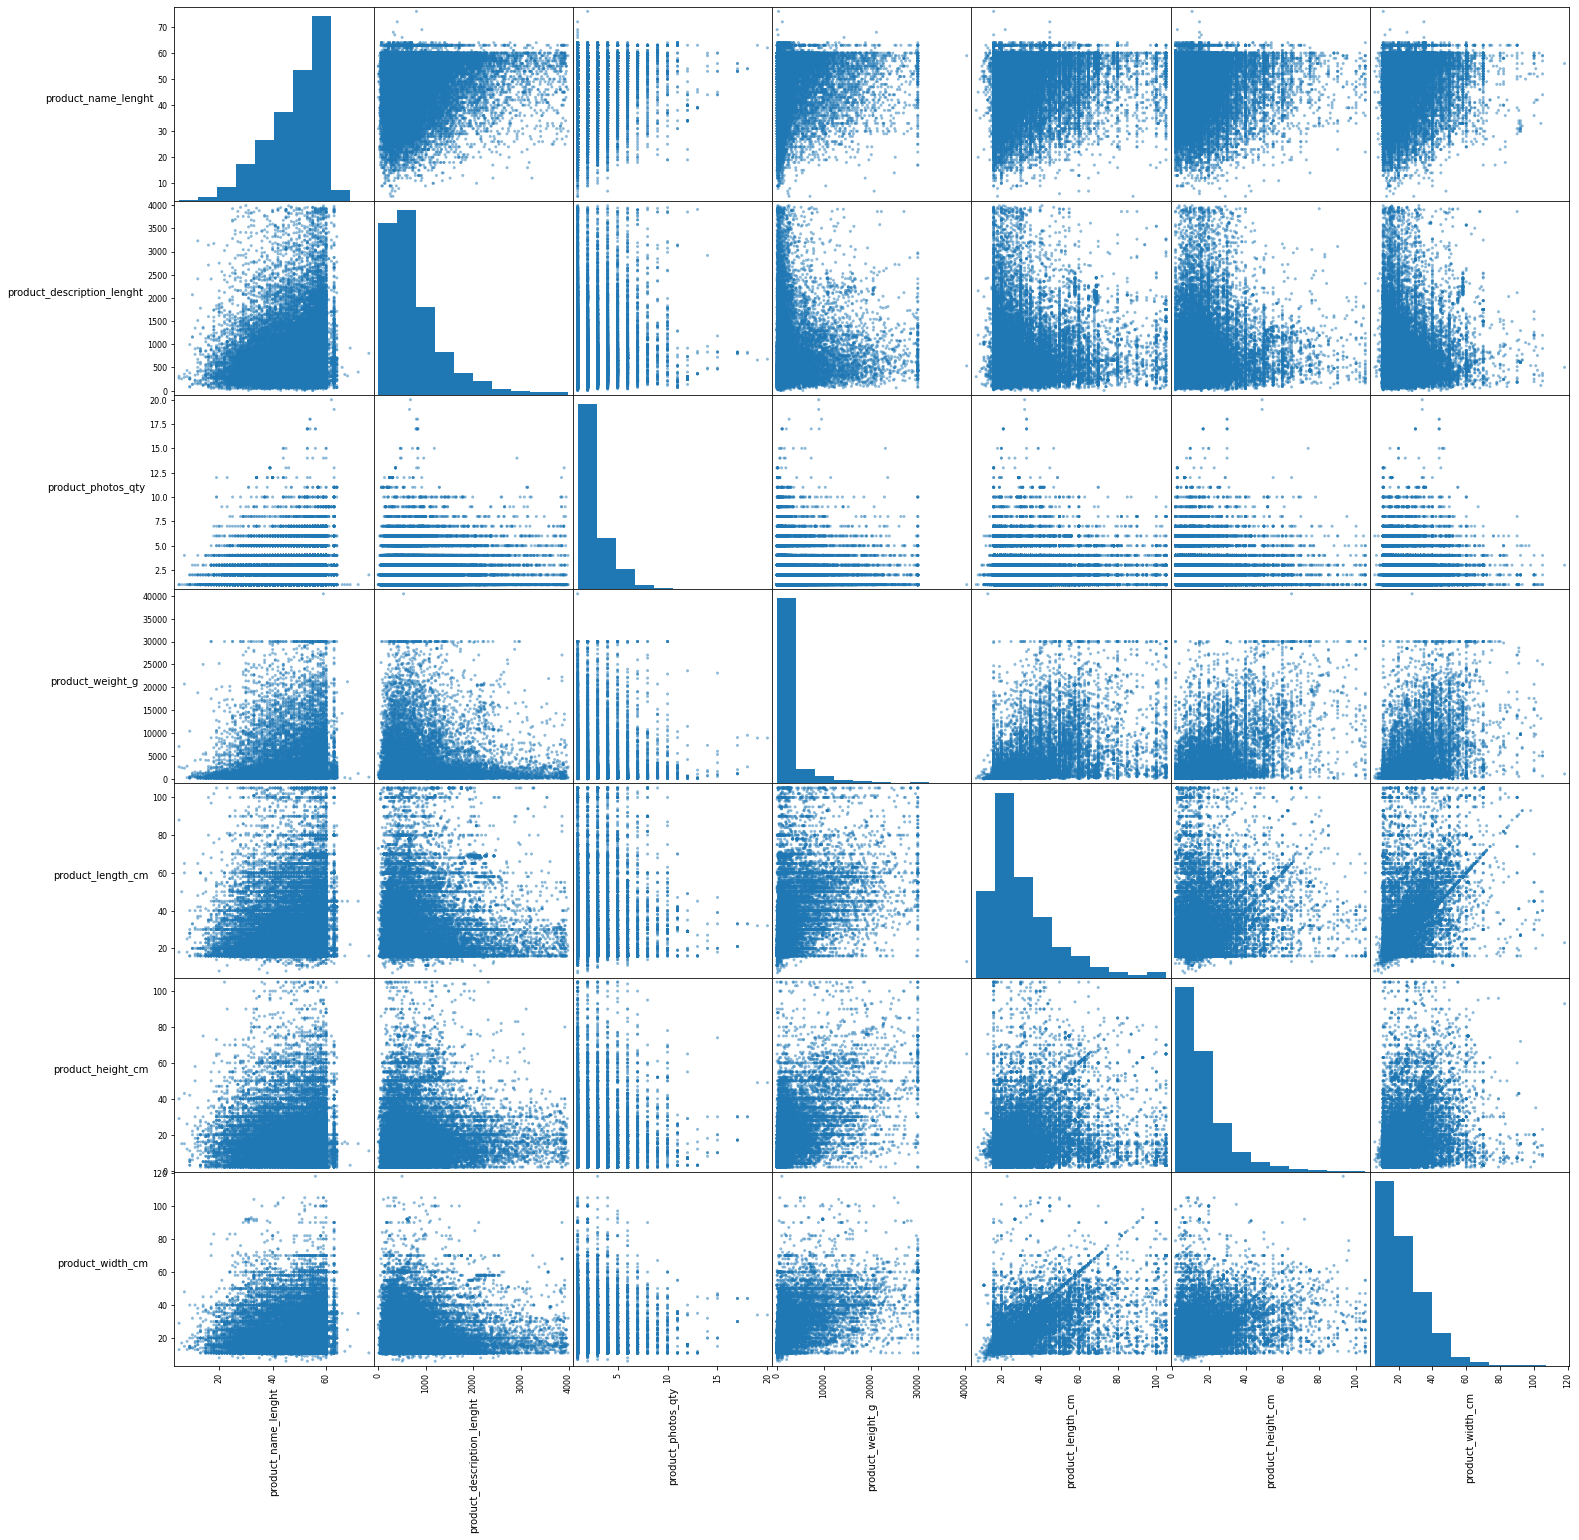

In [53]:
# Checking Correlations between independent variables
numeric_features = [t[0] for t in df_merge_product_and_category.dtypes if t[1] == 'int']
numeric_data = df_merge_product_and_category.select(numeric_features).toPandas()

axs = scatter_matrix(numeric_data, figsize=(25, 25));

# Rotate axis labels and remove axis ticks
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)

In [54]:
# Merge these three dataframes together: orders_dataset, order_payments_dataset, order_items_dataset.
df_merge_1 = orders_dataset.join(order_payments_dataset, on=['order_id'], how='inner')
df_merge_2 = df_merge_1.join(order_items_dataset, on=['order_id'], how='inner')

#df_merge = df_merge_2.drop('order_approved_at', 'order_carrier_delivery_date', 'order_customer_delivery_date', 'order_estimated_delivery_date', 'payment_sequential', 'payment_type', 'payment_installments','shipping_limit_date')
df_merge = df_merge_2.drop_duplicates(['order_id'])
df_merge_order = df_merge.dropna()
df_merge_order = df_merge.select('order_id', 'order_item_id', 'customer_id', 'seller_id', 'product_id', 'order_status', 'order_purchase_timestamp', 'price', 'freight_value', 'payment_value')

df_merge_order.show(2)

+--------------------+-------------+--------------------+--------------------+--------------------+------------+------------------------+-----+-------------+-------------+
|            order_id|order_item_id|         customer_id|           seller_id|          product_id|order_status|order_purchase_timestamp|price|freight_value|payment_value|
+--------------------+-------------+--------------------+--------------------+--------------------+------------+------------------------+-----+-------------+-------------+
|014405982914c2cde...|            1|2de342d6e5905a5a8...|325f3178fb58e2a97...|6782d593f63105318...|   delivered|     2017-07-26 17:38:47| 27.9|         3.81|        78.43|
|019886de8f385a39b...|            1|8cf88d7ba142365ef...|1b4c3a6f53068f0b6...|e9a69340883a438c3...|   delivered|     2018-02-10 12:52:51|159.9|         28.5|        188.4|
+--------------------+-------------+--------------------+--------------------+--------------------+------------+------------------------+---

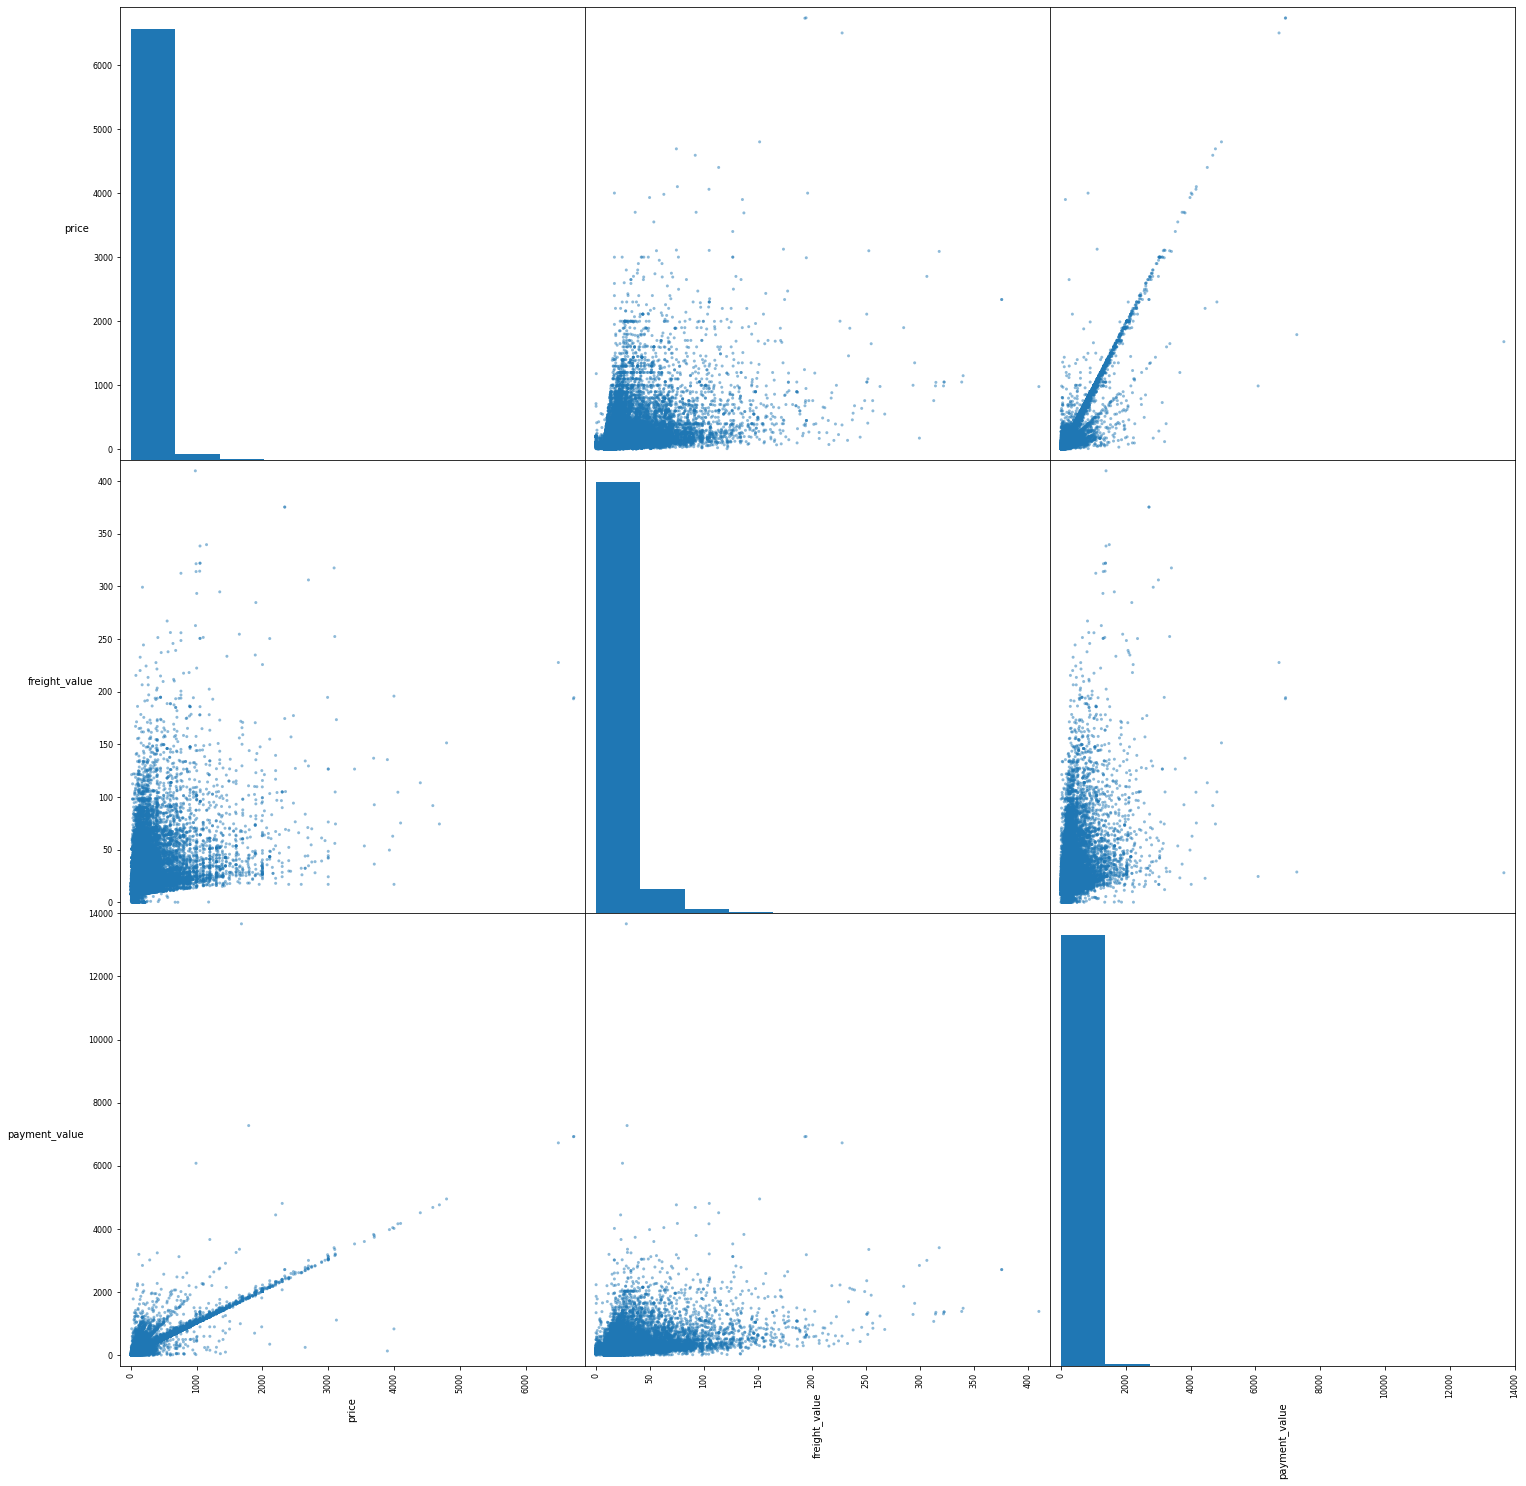

In [55]:
# Checking Correlations between independent variables
numeric_features = [t[0] for t in df_merge_order.dtypes if t[1] == 'double']
numeric_data = df_merge_order.select(numeric_features).toPandas()

axs = scatter_matrix(numeric_data, figsize=(25, 25));

# Rotate axis labels and remove axis ticks
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)

## Explore relationships across the entire dataset

In [56]:
# merge all above dataframes together
merge_df = df_merge_product_and_category.join(df_merge_order, on=["product_id"], how='inner')
merge_df = merge_df.select('product_id', 'price', 'freight_value', 'payment_value','product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g',\
                          'product_length_cm', 'product_height_cm', 'product_width_cm','product_category_name_english','order_purchase_timestamp')

merge_df.show(2)

+--------------------+-----+-------------+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+------------------------+
|          product_id|price|freight_value|payment_value|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|product_category_name_english|order_purchase_timestamp|
+--------------------+-----+-------------+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+------------------------+
|00e4ded51458037ec...|130.0|        38.46|       168.46|                 25|                       978|                 3|            1400|               25|               15|              25|         computers_accesso...|     2017-08-17 10:06:55|
|03d7ad0

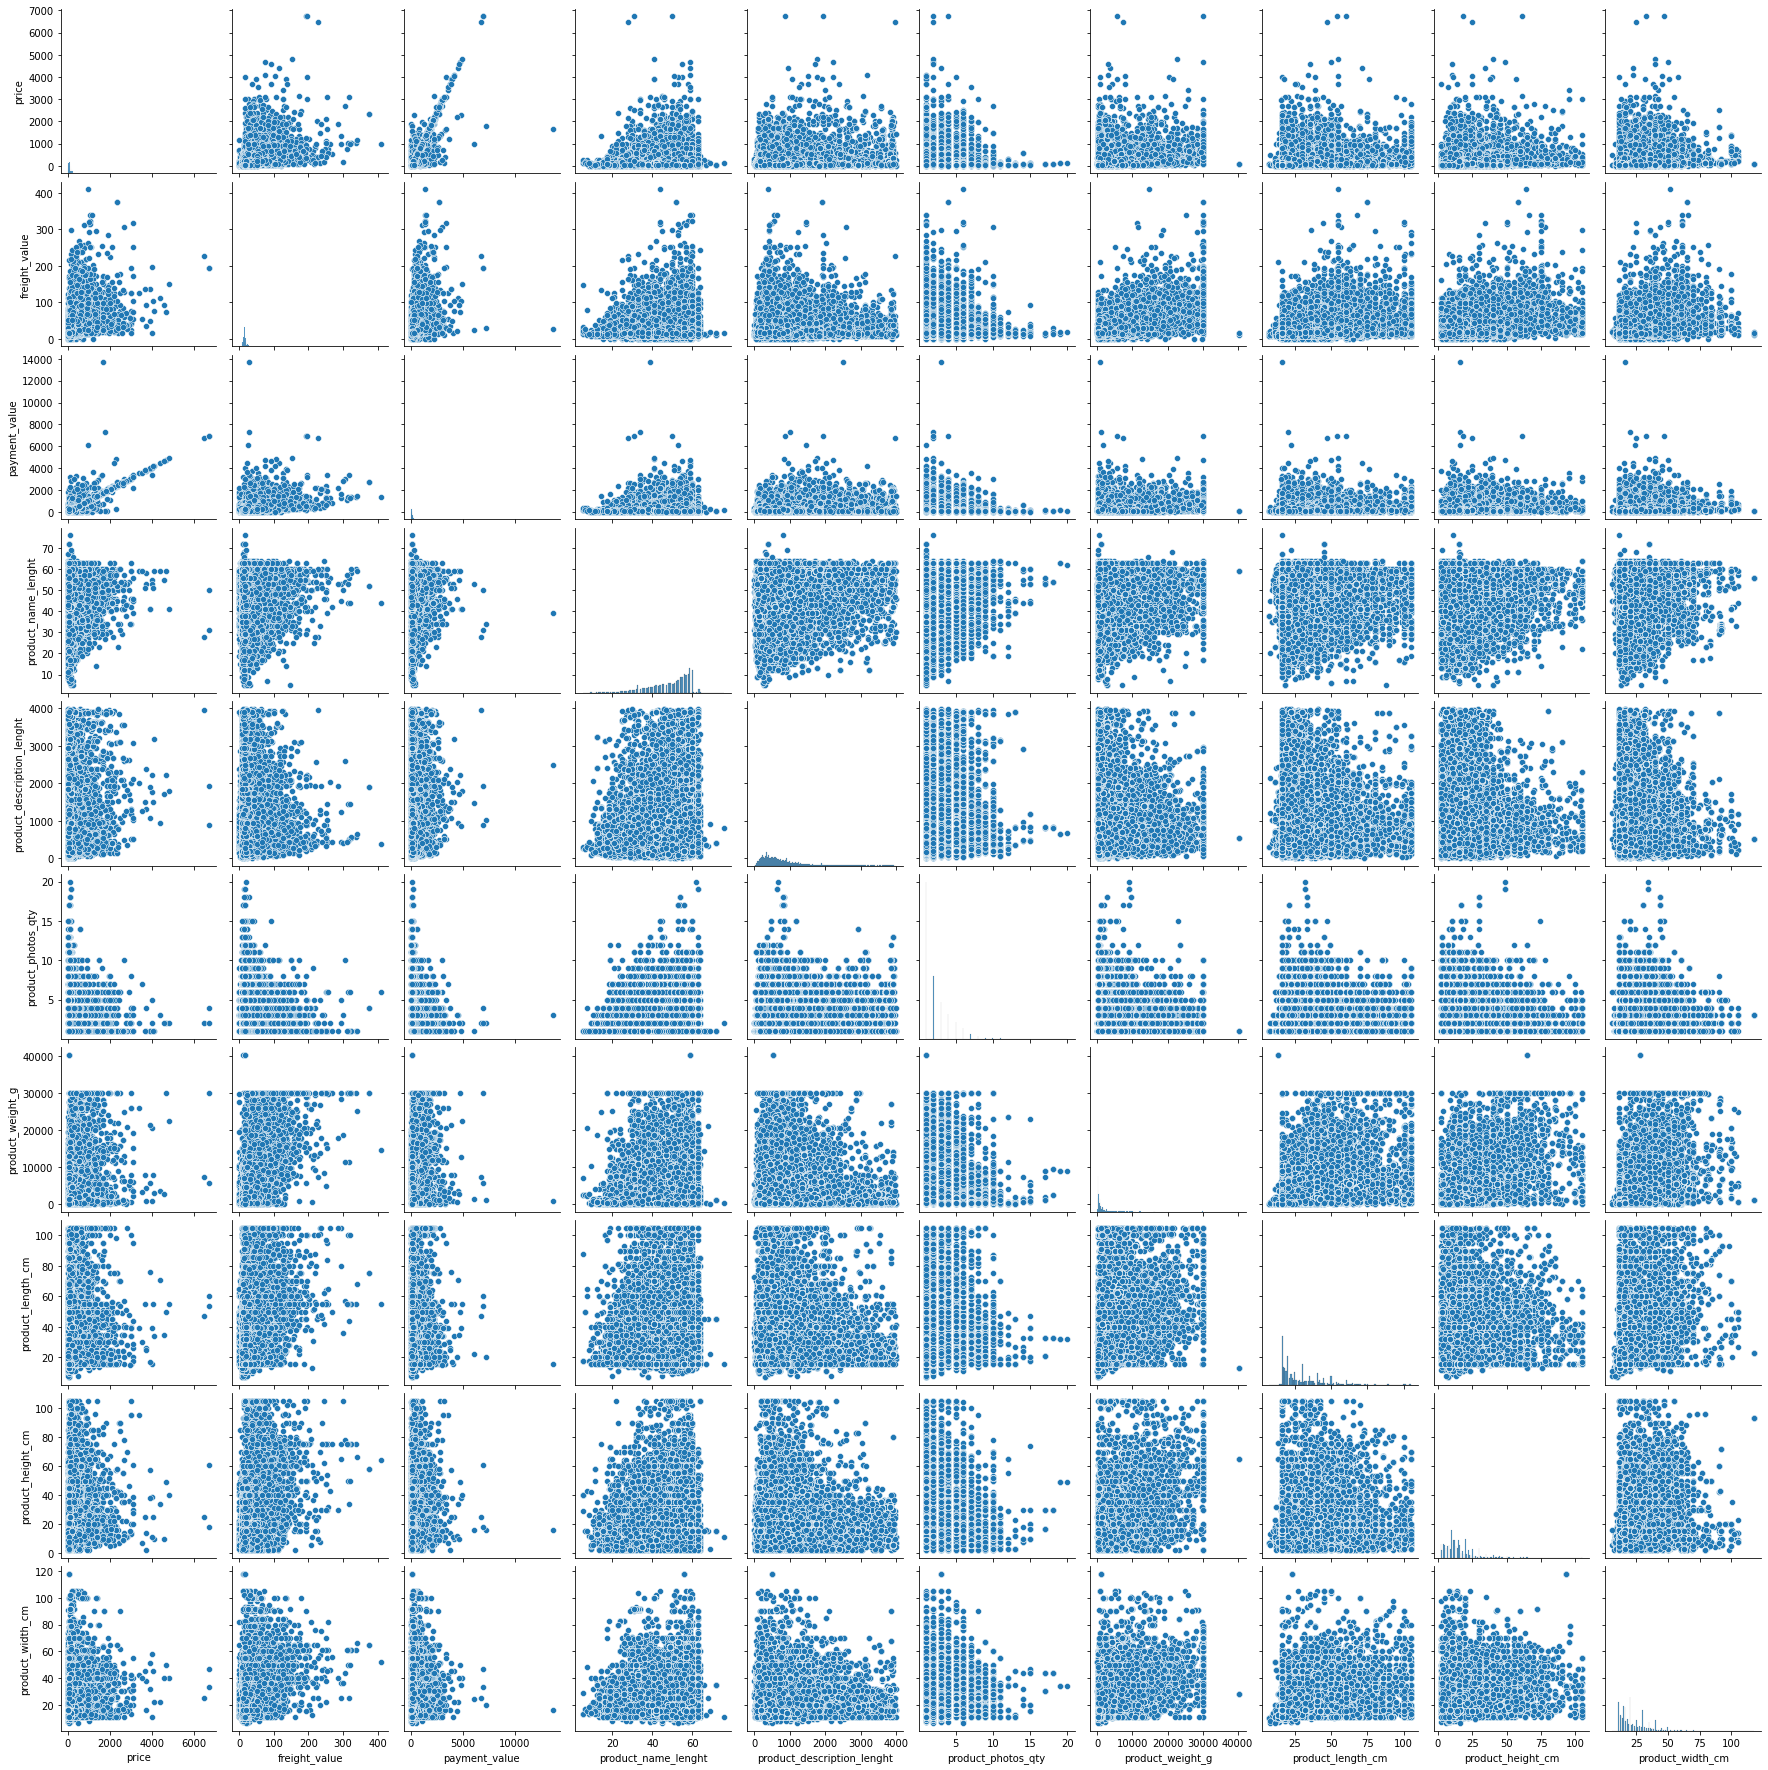

In [57]:
sns.pairplot(merge_df.toPandas())
plt.show()

# Distribution of Data

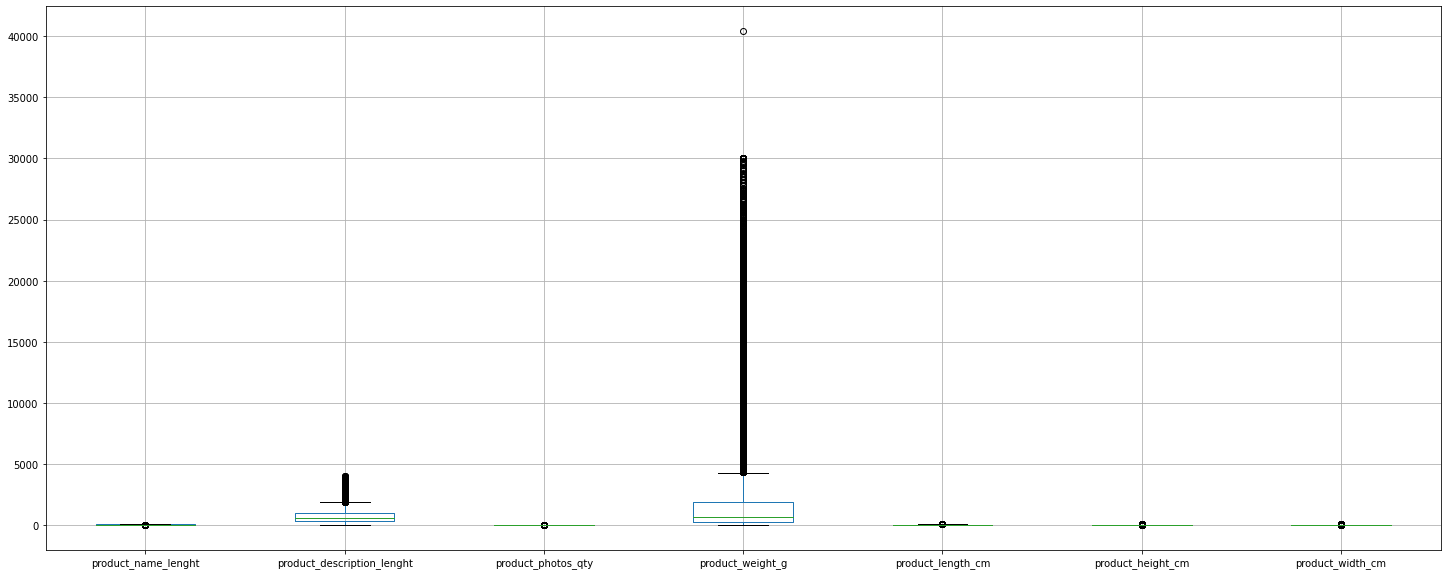

In [58]:
plot = df_merge_product_and_category.toPandas().boxplot(figsize = (25,10))

<AxesSubplot:>

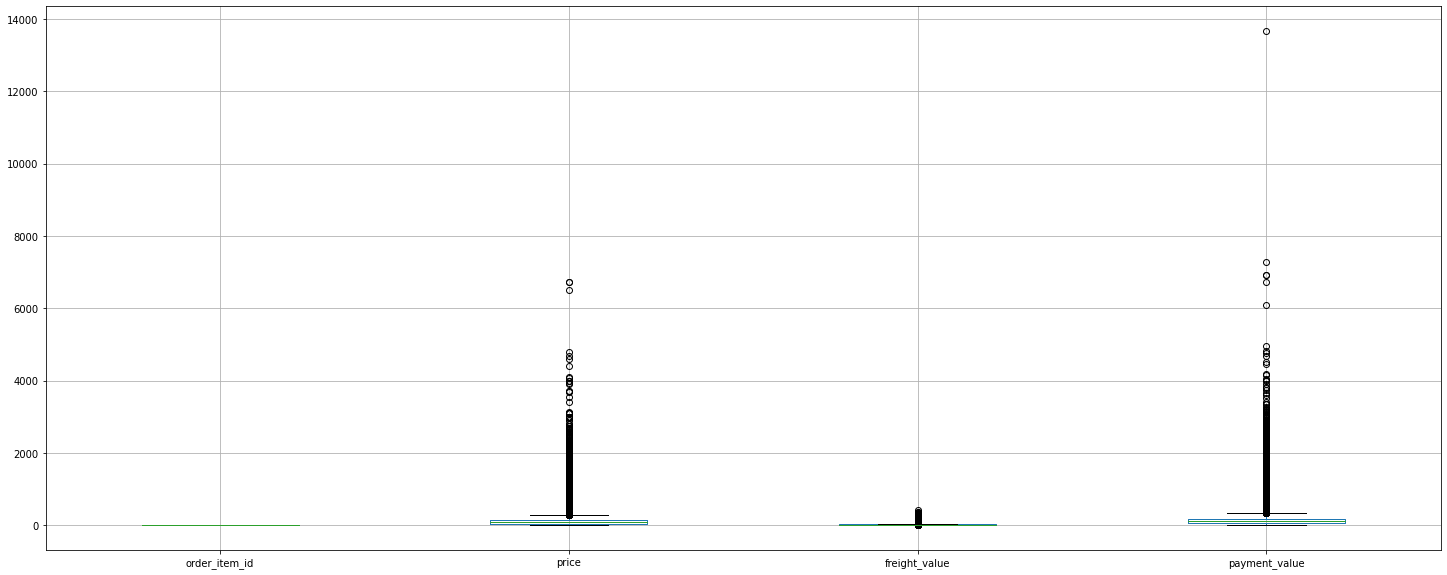

In [59]:
df_merge_order.toPandas().boxplot(figsize = (25,10))

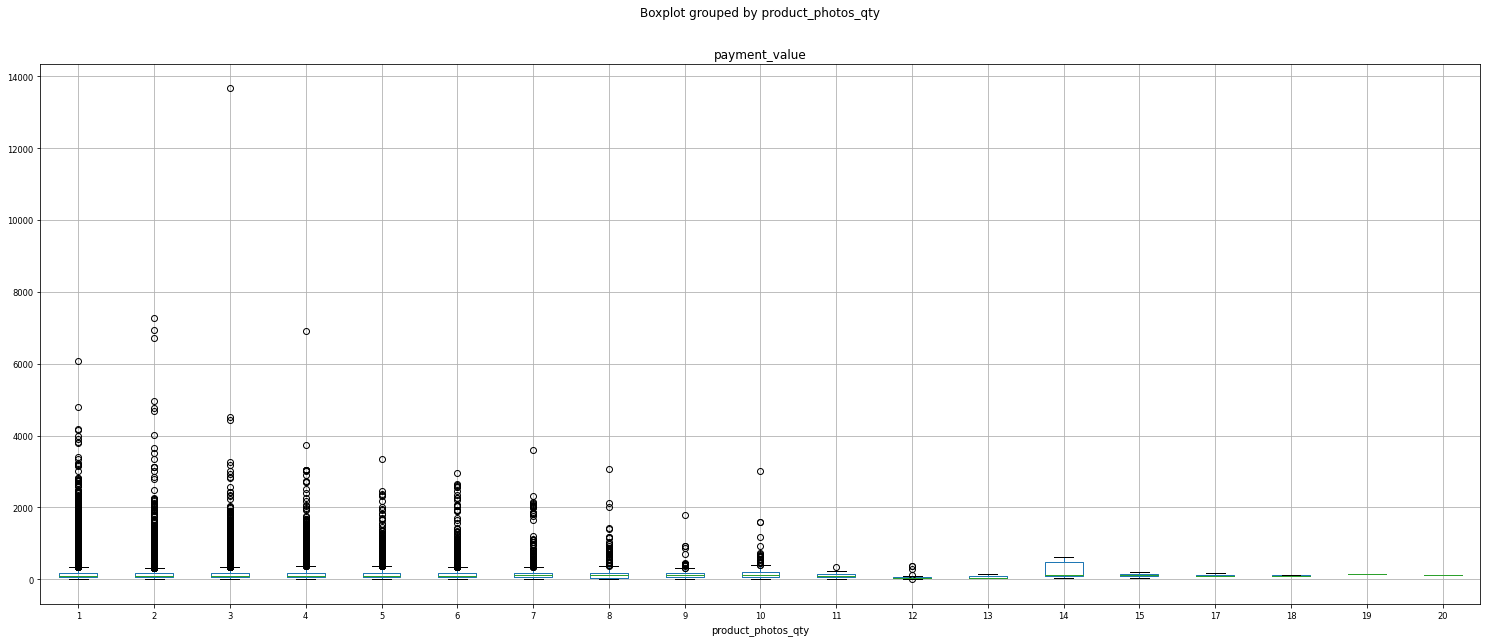

In [60]:
plot = merge_df.toPandas().boxplot(column='payment_value', by='product_photos_qty', fontsize='small', figsize=(25,10))

The boxplot showed that except the outliers, product photos quantity within 10 have higner payment values.

In [61]:
df_merge_new = merge_df.select('product_id', 'order_purchase_timestamp', 'price', 'freight_value','payment_value').orderBy('seller_id', 'product_id')
date_col = df_merge_new.select(date_format(col('order_purchase_timestamp'),"yyyy-MM-dd").alias('Date').cast("date"))
date_col = date_col.withColumn("id", monotonically_increasing_id())
df_merge_new = df_merge_new.withColumn("id", monotonically_increasing_id())
df3 = df_merge_new.join(date_col, on=["id"], how="left").drop("id", "order_purchase_timestamp")
df3 = df3.dropna()
df3.show(2)

+--------------------+-----+-------------+-------------+----------+
|          product_id|price|freight_value|payment_value|      Date|
+--------------------+-----+-------------+-------------+----------+
|08574b074924071f4...| 99.0|        41.08|       280.16|2017-10-08|
|08574b074924071f4...| 99.0|        41.08|       140.08|2017-12-12|
+--------------------+-----+-------------+-------------+----------+
only showing top 2 rows



array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

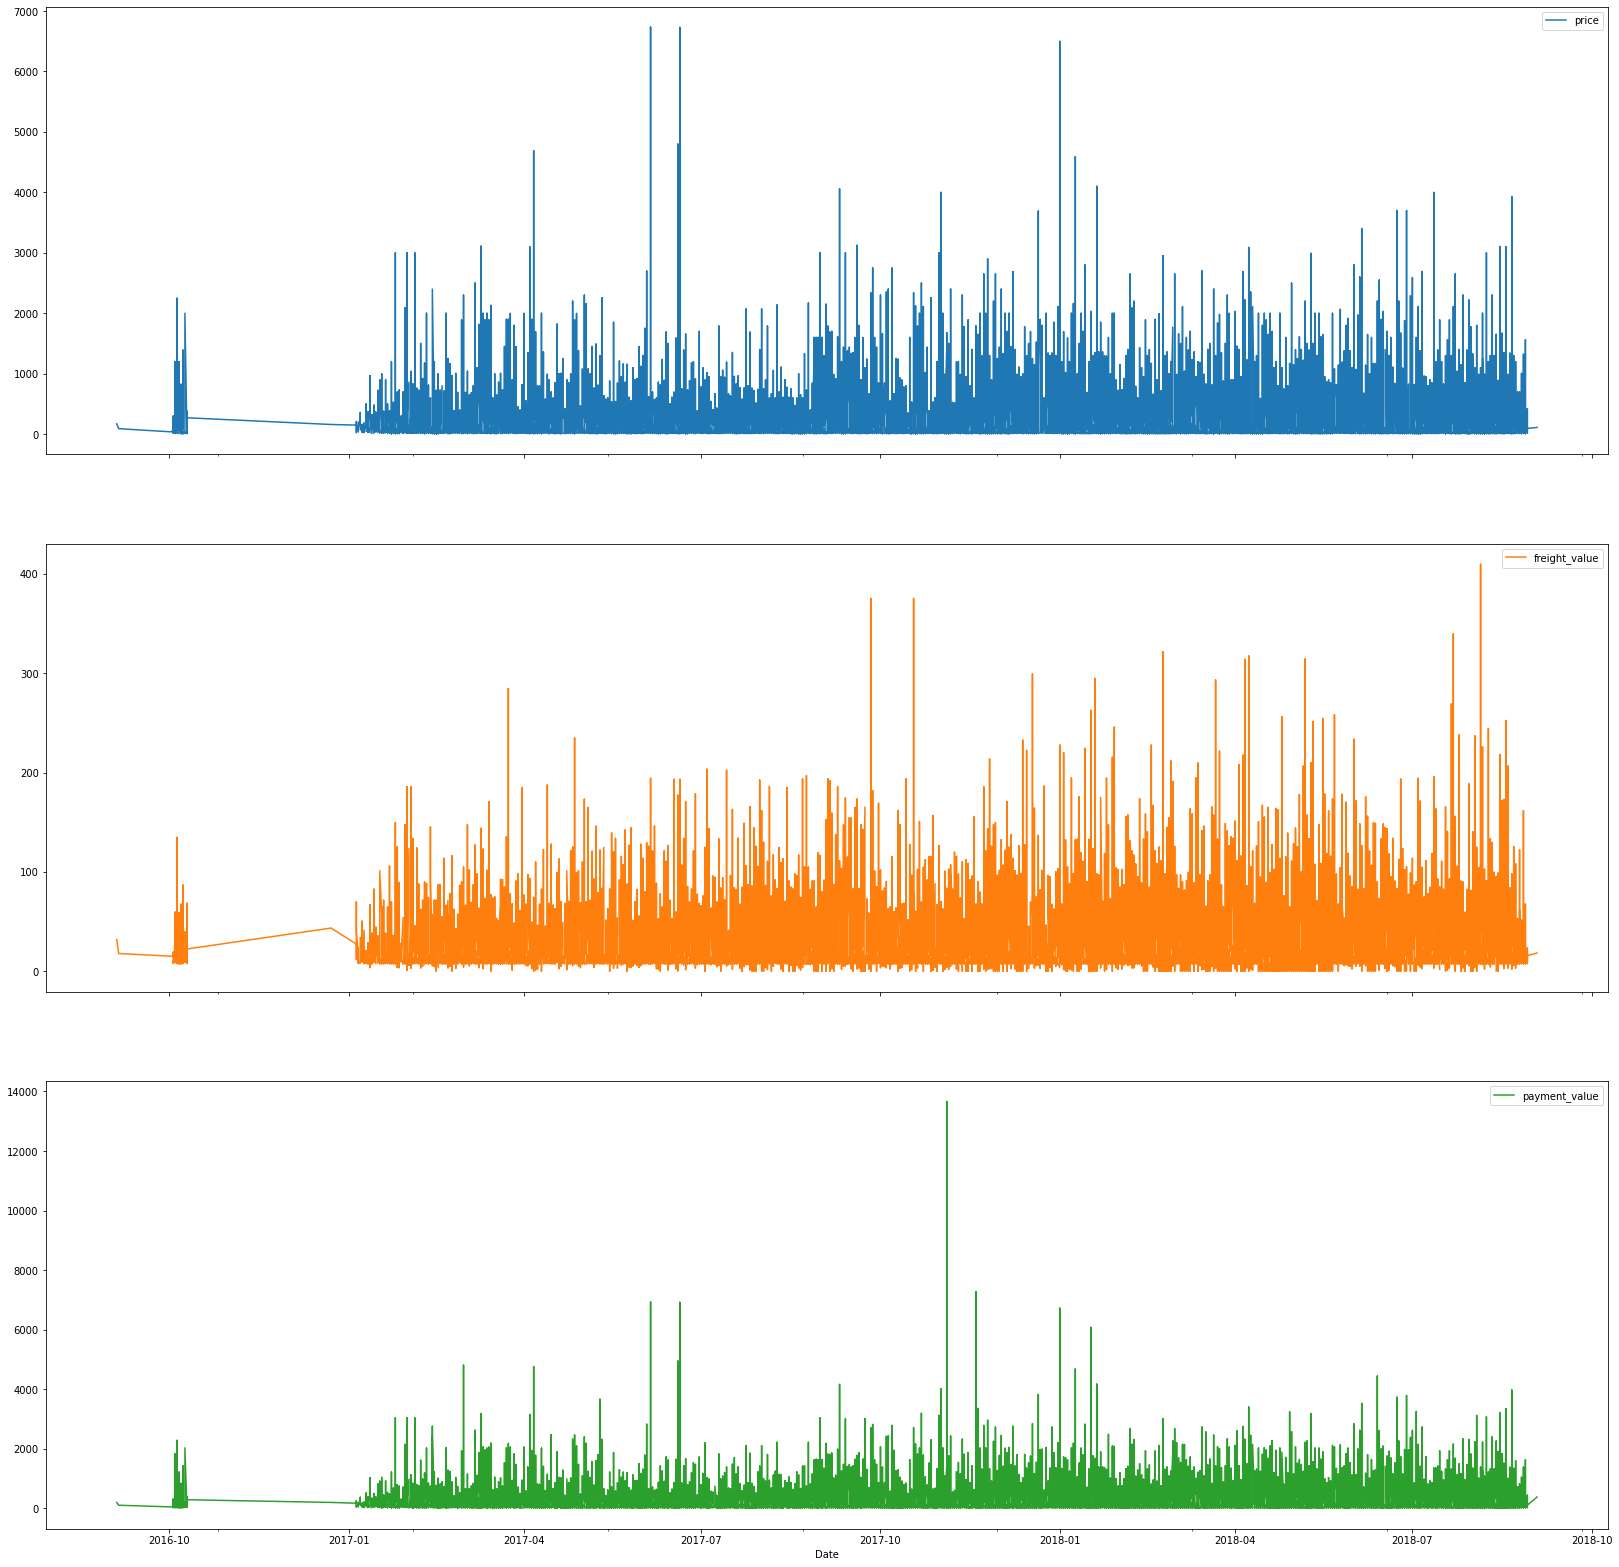

In [62]:
df = df3.toPandas()
df[['Date','price', 'freight_value','payment_value']].plot(x='Date', subplots=True, figsize=(28,28))
plt.show()

# Common trend

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'freight_value'}>,
        <AxesSubplot:title={'center':'payment_value'}>],
       [<AxesSubplot:title={'center':'product_name_lenght'}>,
        <AxesSubplot:title={'center':'product_description_lenght'}>,
        <AxesSubplot:title={'center':'product_photos_qty'}>],
       [<AxesSubplot:title={'center':'product_weight_g'}>,
        <AxesSubplot:title={'center':'product_length_cm'}>,
        <AxesSubplot:title={'center':'product_height_cm'}>],
       [<AxesSubplot:title={'center':'product_width_cm'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

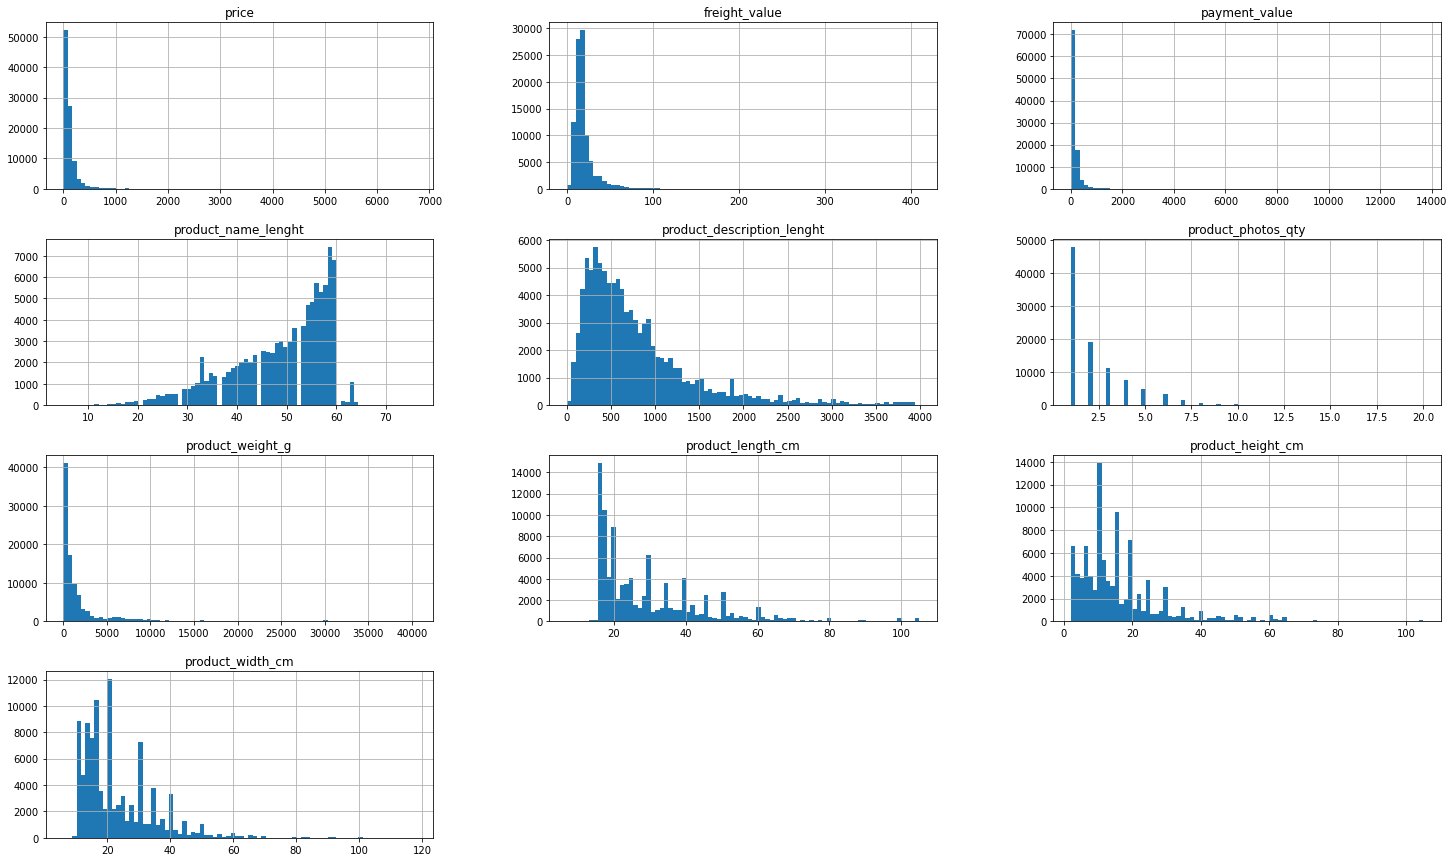

In [63]:
merge_df.toPandas().hist(figsize = (25,15), bins = 80)

# Heatmap for comprehensive overview

<Figure size 1800x1800 with 0 Axes>

<AxesSubplot:>

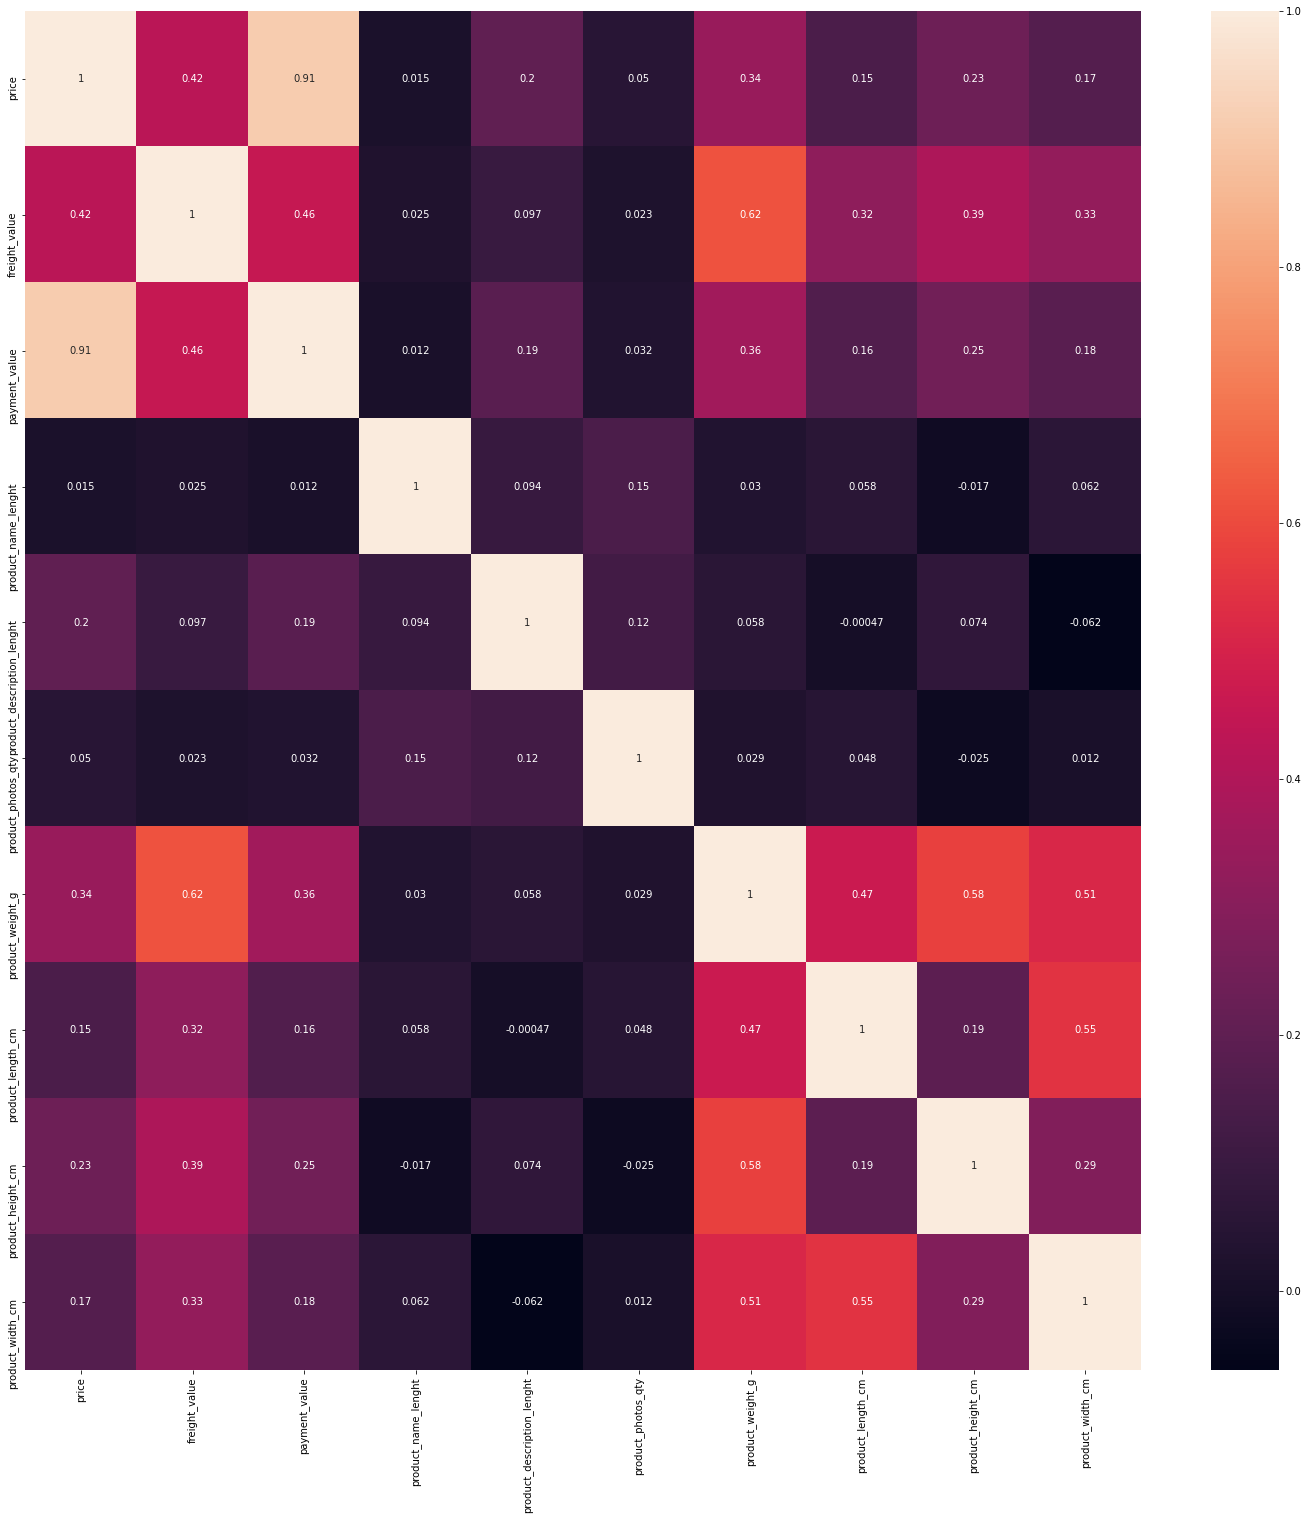

In [64]:
Var_Corr = merge_df.toPandas().corr()
# plot the heatmap and annotation on it
plt.figure(figsize = (25,25))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Stop the spark session

In [65]:
spark.stop()